# ANÁLISIS POPULARIDAD DE LOS SHOW

### Autor:Pedro Jofre
### Curso:Data Science II: Machine Learning para la Ciencia de Datos
### comision: 61190
#### source:https://www.kaggle.com/datasets/asaniczka/full-tmdb-tv-shows-dataset-2023-150k-shows?resource=download.

## Objetivos
Obtener datos de diversas fuentes públicas para luego analizarlos mediante el lenguaje Python con el fin de contestar preguntas de interés para una industria, negocio o proyecto personal. Se deberán utilizar datasets complejos implementando técnicas avanzadas para la limpieza y adquisición de datos
<br>
Contar una historia que ponga el contexto la solución que se aplicará.

Estructurar el contexto en función de múltiples pero simples preguntas/hipótesis a responder
Importar datos crudos usando herramientas de Python
Limpiar y transformar los datos para permitir un posterior análisis
Generar el Análisis exploratorio de Datos (EDA).
Generar el Análisis estadístico de Datos ( Univariado, Bivariado y Multivariado*)


## Contexto
### The Movie Database

El conjunto de datos proporciona información crucial para analizar las tendencias y predecir el éxito de películas y shows de televisión utilizando información de The Movie Database (TMDB). La base de datos esta compuesta por 29 variables y mas de 150000 registros, los cuales incluyen atributos interesantes de analisis como el genero, popularidad y fecha de emision, permitiendo la segmentación y análisis detallado. Esta cantidad de datos permite una comprensión profunda y detallada de las preferencias y comportamientos de la audiencia.

Los análisis derivados de este dataset presentan una oportunidad valiosa para la industria del entretenimiento, permitiendo la identificación de factores que impulsan la popularidad, la evaluación de la efectividad de estrategias de lanzamiento y marketing, y la formulación de recomendaciones personalizadas para los usuarios, por mencionar algunos.

Este conjunto de datos es una herramienta invaluable para investigadores y profesionales de la industria del entretenimiento, contribuyendo a la mejora de la toma de decisiones estratégicas, la personalización de la experiencia del usuario y el incremento de la satisfacción y retención de la audiencia. 

### Hipotesis

En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

#### preguntas
Existe un aumento en la cantidad de show emitidos a traves del tiempo? <br>
En que estacion se tiene mayor estreno/finalizacion de show?<br>
existe una relacion entre los generos y la estacion ?<br>
Que generos son los mas populares? <br>
cual es la lengua mas popular?<br>
Como medir la eficiencia de un show? <br>

## Hipotesis: 
En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

En primer lugar se carga las librerias necesarias y la base previamente descargada.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, AutoDateLocator,AutoDateFormatter,YearLocator
import seaborn as sns
from wordcloud import WordCloud


In [87]:
table= pd.read_csv('TMDB_tv_dataset_v3.csv')
table.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [88]:
table.shape

(168639, 29)

In [89]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

A continuacion revisamos los faltantes de la base

<Axes: >

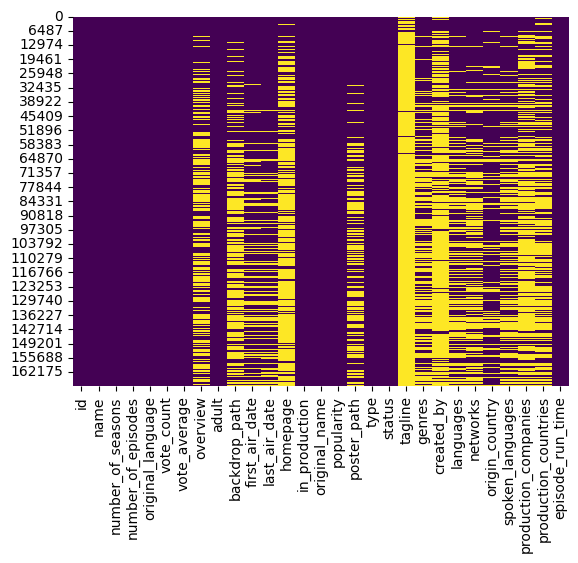

In [90]:
sns.heatmap(table.isnull(),cmap='viridis',cbar=False)

In [91]:
(table.isnull().sum()).sum()

1190189

Como se puede observar los datos poseen una gran cantidad de datos faltantes. Por lo que en primer lugar se una limpieza de datos, a continuacion se dara un resumen de los puntos mas importantes, se puede observar todos los pasos tomados en la transformacion en el notebook "data_wrapping Jofre.ipynb".<br> Para facilitar la visualizacion de la data es necesario renombrar las variables a traves de la funcion rename. 

In [92]:
nombres_columnas= {'id':"id",
'name':"Nombre_Serie",
'number_of_seasons':"num_Temporadas",
'number_of_episodes':"num_Episodios",
'original_language':"Idioma_original",
'vote_count':"Votos_Totales",
'vote_average':"Voto_promedio",
'overview':"Resumen",
'adult':"Categoria_Adulto",
'backdrop_path':"url_Imagen",
'first_air_date':"Fecha_Inicio",
'last_air_date':"Fecha_Fin",
'homepage':"Pagina",
'in_production':"En_Produccion",
'original_name':"Nombre_Original",
'popularity':"Popularidad",
'poster_path':"url_Poster",
'type':"Tipo_Show",
'status':"Status",
'tagline':"Frase",
'genres':"Generos",
'created_by':"Creador",
'languages':"Idiomas",
'networks':"Canales",
'origin_country':"Pais_Origen",
'spoken_languages':"Idiomas_hablados",
'production_companies':"Companias_Produccion",
'production_countries':"Paises_Produccion",
'episode_run_time':"Duracion_episodio"}

table.rename(columns=nombres_columnas,inplace=True)

- En primer lugar se eliminaran los 5 registros que no poseen nombre, ya que corresponden a un porcentaje menor del 0.01% 
- Se eliminan los campos que no entregan mayor informacion relevante para el analisis propuesto como:Resumen,url_Imagen,Pagina,url_Poster,Frase
- Se elimina las filas que no poseen fecha de inicio o fin 
- Se rellena la informacion faltante en los campos 'Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion' como 'sin informacion'

In [93]:
table=table.dropna(subset=['Nombre_Serie'])
table=table.drop(columns=['Resumen','url_Imagen','url_Poster','Frase','Pagina'])
table=table.dropna(subset=['Fecha_Inicio','Fecha_Fin' ])
columnas= ['Generos','Creador','Idiomas','Canales','Pais_Origen','Idiomas_hablados','Companias_Produccion','Paises_Produccion']
for c in columnas:
    table[c]=table[c].fillna('sin informacion')

In [94]:
table.shape

(135806, 24)

Se puede observar que luego de los cambios se mantiene sobre un 80% de los datos originales

A continuacion se realiza el proceso de enriquecimiento, donde generaremos nuevos campos a partir de la informacion recolectada para la calidad de nuestra base, al igual que el tratamiento de nulos si quiere revisar en detalles todos los pasos los puede observar en el notebook "data_wrapping Jofre.ipynb". Para dar un resumen los procesos realizados fueron los siguientes:<br>
1- para cada columna que consiste en un array de string se crea un nuevo campo que muestre cuantos datos existen en la columna, como por ejemplo generos.<br>
2- se crea nuevas columnas relacionada a la fecha, como año, mes y estacion.<br>
3- Se crean bases de datos auxiliares de los campos trabajados en el punto 1 utilizando el id del show como llave foreana. <br>
4- se eliminan las columnas del punto 1 y se guarda la nueva base base transformada.

Los pasos anteriores dan como resultados una base de datos con esquema de estrella, con la tabla de hechos siendo "TMDB_procesado.csv" y 8 tablas de dimensiones, las cuales muestran informacion adicional para cada show.

In [95]:
tmdb=pd.read_csv('TMDB_procesado.csv')
tmdb.head()

,id,Nombre_Serie,#_Temporadas,#_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,Fecha_Inicio,Fecha_Fin,En_Produccion,...,num_Paises_Produccion,num_Pais_Origen,Mes_I,estacion_I,estacion_I_n,anho_I,Mes_F,estacion_F,estacion_F_n,anho_F
0,1399,Game of Thrones,8,73,21857,8.442,False,2011-04-17,2019-05-19,False,...,2,1,4,0,primavera,2011,5,1,verano,2019
1,71446,Money Heist,3,41,17836,8.257,False,2017-05-02,2021-12-03,False,...,1,1,5,1,verano,2017,12,0,primavera,2021
2,66732,Stranger Things,4,34,16161,8.624,False,2016-07-15,2022-07-01,True,...,1,1,7,3,invierno,2016,7,3,invierno,2022
3,1402,The Walking Dead,11,177,15432,8.121,False,2010-10-31,2022-11-20,False,...,1,1,10,2,otoño,2010,11,3,invierno,2022
4,63174,Lucifer,6,93,13870,8.486,False,2016-01-25,2021-09-10,False,...,1,1,1,1,verano,2016,9,1,verano,2021


Una vez que se ha limpiado y enriquecido la base, es necesario estudiar en mas detalle las variables a trabajar, en primer lugar se estudiara las variables categoricas.

C:\Users\Pedro\AppData\Local\Temp\ipykernel_20952\2659127758.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_20952\2659127758.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_20952\2659127758.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
C:\Users\Pedro\AppData\Local\Temp\ipykernel_20952\2659127758.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.

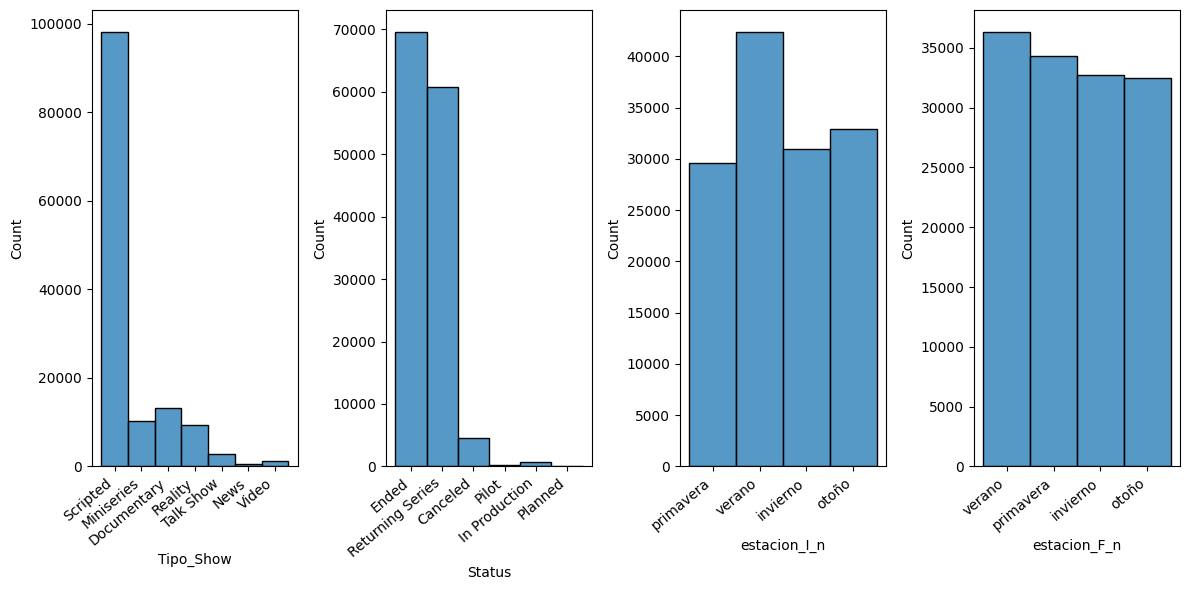

In [96]:
fig, axis = plt.subplots(1, 4, figsize = (12, 6))

# Crear un histograma múltiple
ax1=sns.histplot(ax = axis[ 0], data = tmdb, x = "Tipo_Show")
ax2=sns.histplot(ax = axis[1], data = tmdb, x = "Status")
ax3=sns.histplot(ax = axis[ 2], data = tmdb, x = "estacion_I_n")
ax4=sns.histplot(ax = axis[3], data = tmdb, x = "estacion_F_n")

# Ajustar el layout
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

# Mostrar el plot
plt.show()


tipo show: Se puede observar que existe una diferencia entre la cantidad e show scripted y el resto<br>
Status: en este caso los valores estan desvalanceados hacia los Ended y Returning series <br>
Estaciones de inicio: se observa que en verano se tiene un mayor porcentaje de show en estreno, lo cual puede estar relacionado a que esta epoca corresponde a cuando la mayor parte de la poblacion esta en vacaciones por lo que las productoras aprovechan de estrenar nuevos show al tener mayor publico<br>
Estacion de Fin: A diferencia de la estacion de inicio aca no se observa una mayor diferencia entre la cantidad de show terminados por fecha.  

Se crean nuevas columnas boleanas para indicar si el show es scripted, si esta en estado terminado o esta en estado de restreno.  

In [97]:
tmdb['scripted']=tmdb['Tipo_Show'].apply(lambda x: 1 if x=='Scripted' else 0)
tmdb['Terminado']=tmdb['Status'].apply(lambda x: 1 if x=='Ended' else 0)
tmdb['Serie reestrenada']=tmdb['Status'].apply(lambda x: 1 if x=='Returning Series' else 0)

In [98]:
tmdb['Terminado'].value_counts()
tmdb['Serie reestrenada'].value_counts()

Serie reestrenada
0    75114
1    60692
Name: count, dtype: int64

In [99]:
tmdb_corr=tmdb.drop(columns=["Nombre_Serie","Fecha_Inicio","Fecha_Fin","Nombre_Original","estacion_I_n","estacion_F_n","Tipo_Show","Status","Pais_Origen"])
tmdb_corr.corr()

,id,#_Temporadas,#_Episodios,Votos_Totales,Voto_promedio,Categoria_Adulto,En_Produccion,Popularidad,Duracion_episodio,num_Generos,...,num_Pais_Origen,Mes_I,estacion_I,anho_I,Mes_F,estacion_F,anho_F,scripted,Terminado,Serie reestrenada
id,1.000000,-0.161406,-0.101966,-0.066268,-0.290441,0.015495,0.403314,-0.078248,-0.210060,-0.187494,...,0.073124,0.006806,0.008097,0.405007,0.005987,0.021949,0.363979,-0.072621,-0.383627,0.400662
#_Temporadas,-0.161406,1.000000,0.412525,0.062667,0.119237,-0.024301,0.069773,0.185672,0.054484,0.059834,...,0.055553,-0.000002,-0.005535,-0.148751,0.017122,-0.012423,0.042809,-0.072262,-0.077111,0.067532
#_Episodios,-0.101966,0.412525,1.000000,0.033175,0.076141,-0.020801,0.000474,0.339565,0.028152,0.067845,...,0.042270,0.002441,-0.004559,-0.091749,0.012901,0.000186,0.008792,-0.000792,-0.003709,0.000717
Votos_Totales,-0.066268,0.062667,0.033175,1.000000,0.107980,-0.008691,-0.033394,0.214690,0.016627,0.108734,...,0.027519,0.006809,0.000650,0.006255,0.000249,0.000500,0.024080,0.025949,0.021391,-0.032323
Voto_promedio,-0.290441,0.119237,0.076141,0.107980,1.000000,0.014228,-0.219298,0.117073,0.152678,0.390566,...,0.143654,0.013445,0.009247,-0.017840,0.015186,-0.003519,0.019251,-0.044127,0.198510,-0.210752
Categoria_Adulto,0.015495,-0.024301,-0.020801,-0.008691,0.014228,1.000000,-0.044554,-0.018270,-0.028951,-0.027258,...,0.006431,0.009957,0.000528,0.006525,0.003887,0.004450,0.002089,-0.034571,0.051587,-0.044956
En_Produccion,0.403314,0.069773,0.000474,-0.033394,-0.219298,-0.044554,1.000000,-0.014663,-0.181267,-0.265174,...,-0.206835,-0.004169,0.007615,0.348897,-0.002016,0.016302,0.371747,0.051029,-0.935063,0.985296
Popularidad,-0.078248,0.185672,0.339565,0.214690,0.117073,-0.018270,-0.014663,1.000000,0.025037,0.112772,...,0.048946,0.010305,-0.001163,-0.047771,0.015508,0.000952,0.000474,0.014704,0.008832,-0.013371
Duracion_episodio,-0.210060,0.054484,0.028152,0.016627,0.152678,-0.028951,-0.181267,0.025037,1.000000,0.130579,...,0.101985,0.002098,0.002545,-0.074778,0.001569,0.001505,-0.060665,-0.082403,0.174300,-0.180565
num_Generos,-0.187494,0.059834,0.067845,0.108734,0.390566,-0.027258,-0.265174,0.112772,0.130579,1.000000,...,0.231048,0.009643,-0.000694,-0.023569,0.018922,-0.001052,-0.002052,-0.054155,0.239446,-0.266087


In [100]:
tmdb_corr['num_Idioma_original'].value_counts()

num_Idioma_original
1    135806
Name: count, dtype: int64

Se observa que la correlacion para idioma original es NaN que al hacer el conteo de valores se observa que cada show tiene solo un idioma original, por lo que esta columna no entregara mayor informacion por lo uqe sera eliminada. 

In [101]:
tmdb=tmdb.drop(columns='num_Idioma_original')

In [102]:
tmdb_corr['Categoria_Adulto']=tmdb_corr['Categoria_Adulto'].astype(int)
tmdb_corr['En_Produccion']=tmdb_corr['En_Produccion'].astype(int)

<Axes: >

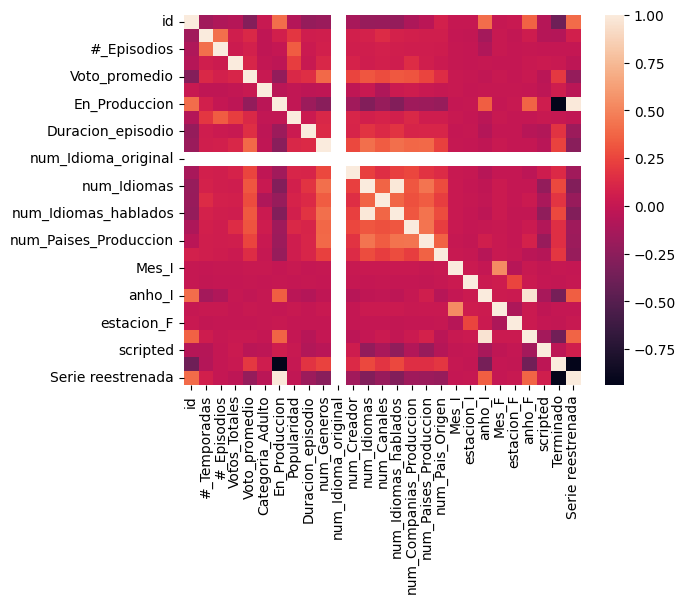

In [103]:
sns.heatmap(tmdb_corr.corr())

Del heatmap se puede observar lo siguiente: <br>
Existe una correlacion fuerte entre idiomas e idiomas hablados.<br>
Existe una gran relacion entre serie reestrenada y en produccion, esto es normal ya que si se esta restrenando, la serie debe estar produciendose. <br>
Se observa ademas (para ambos puntos anteriores) que las variables tienen el mismo comportamiento con el resto, por lo que se puede dejar solo 1 de esta sin perder informacion.<br>
Existe una relacion fuerte negativa entre una serie terminada y en reestreno, lo que hace sentido ya que no es posible que una serie existe en ambos estado al mismo tiempo.<br>


In [104]:
genero=pd.read_csv('Generos.csv')
genero.head()
pais=pd.read_csv('Paises_Produccion.csv')
pais.head()

,id_show,Paises_Produccion
0,1399.0,United Kingdom
1,1399.0,United States of America
2,71446.0,Spain
3,66732.0,United States of America
4,1402.0,United States of America


In [105]:
genero['Generos'].value_counts()

Generos
sin informacion       44210
Drama                 31267
Comedy                21633
Documentary           20384
Animation             11032
Reality               10626
Action & Adventure     6795
Crime                  6523
Family                 6232
Sci-Fi & Fantasy       5920
Mystery                4940
Kids                   3878
Talk                   3115
Soap                   1989
War & Politics         1677
News                    941
Western                 313
Romance                 181
Music                    43
History                  42
Musical                   1
Name: count, dtype: int64

## POPULARIDAD

Existen 3 valores que uno puede utilizar para comparar los programas:  
 1) Popularidad: Valor que genera la pagina en base a diversas variables, como votos, clic en el dia, popularidad del dia anterior, entre otros, es necesario recalcar que esta formula no esta disponible para el publico.   
 2) Votos Totales: Votos que ha recibido por parte de los usuarios desde que se agrego a la base 
 3) Votos Promedio: Promedio del valor de los votos recibido.

Text(0.5, 1.0, 'Votos Totales')

<Figure size 1400x800 with 0 Axes>

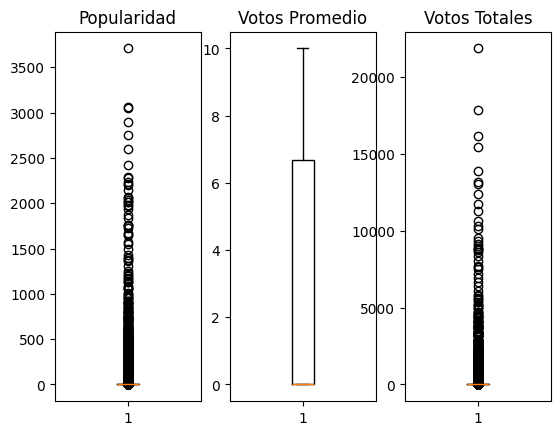

In [106]:
plt.figure(figsize=(14, 8))
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(tmdb['Popularidad'])
axs[0].set_title('Popularidad')
axs[1].boxplot(tmdb['Voto_promedio'])
axs[1].set_title('Votos Promedio')
axs[2].boxplot(tmdb['Votos_Totales'])
axs[2].set_title('Votos Totales')

In [107]:
print("Top 3 segun popularidad")
print(tmdb[['Nombre_Serie','Popularidad']].sort_values('Popularidad',ascending=False).head(3))
print("Top 3 segun votos totales")
print(tmdb[['Nombre_Serie','Voto_promedio']].sort_values('Voto_promedio',ascending=False).head(3))
print("Top 3 segun votos promedio")
print(tmdb[['Nombre_Serie','Votos_Totales']].sort_values('Votos_Totales',ascending=False).head(3))

Top 3 segun popularidad
                            Nombre_Serie  Popularidad
1771  The Late Show with Stephen Colbert     3707.008
3032                       Batang Quiapo     3065.138
2283                          Tagesschau     3049.228
Top 3 segun votos totales
               Nombre_Serie  Voto_promedio
47718  Hipster Tour - Spain           10.0
40681                 温柔的背后           10.0
40640     Ghar Titli Ka Par           10.0
Top 3 segun votos promedio
      Nombre_Serie  Votos_Totales
0  Game of Thrones          21857
1      Money Heist          17836
2  Stranger Things          16161


In [108]:
print(tmdb['Popularidad'].value_counts())

Popularidad
0.600       40688
1.400        3937
0.000        2173
0.840        1424
1.960         705
            ...  
169.693         1
300.805         1
8.733           1
12.860          1
1171.542        1
Name: count, Length: 20318, dtype: int64


Se puede observar que dependiendo de cual valor se escoge, se obtienen 3 distintas respuesta a cual es el show mas popular en la pagina, ademas que los tres campos tienen los valores concentrados cerca del 0 con un 50% de los casos. Esto ocurre ya que la base se alimenta por la interaccion de usuarios por lo que no todos los usuarios votaran por cada show existente. 

## show emitidos por año 

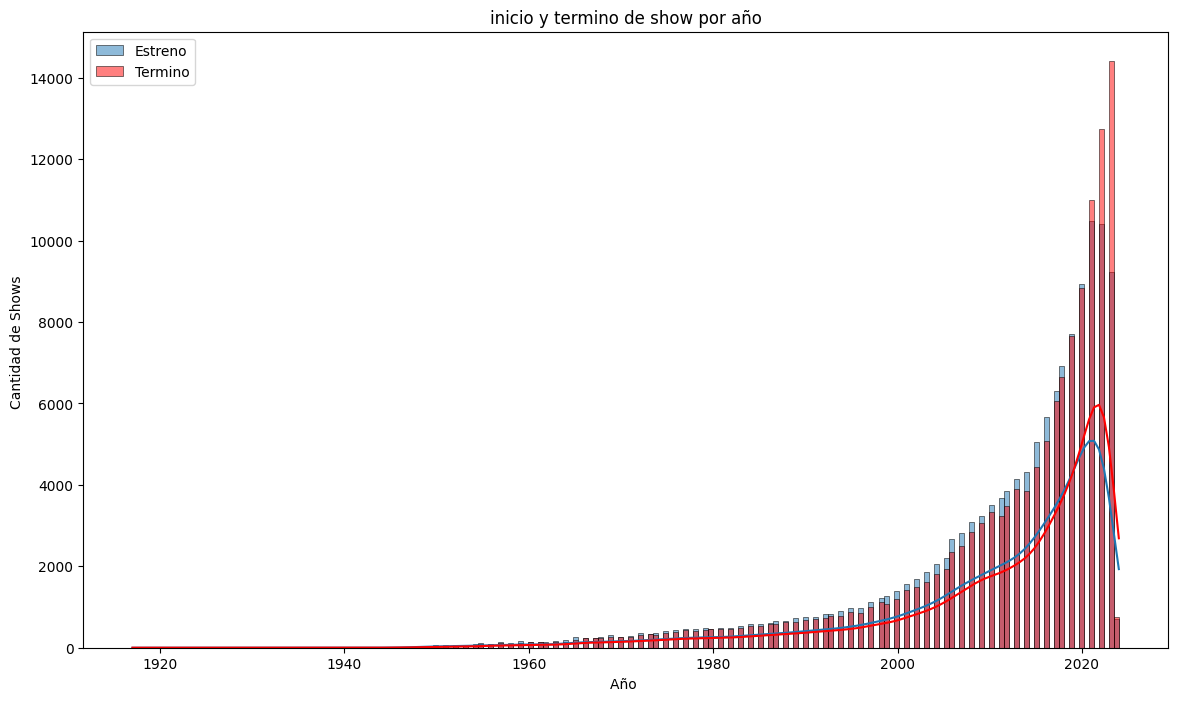

In [109]:
tmdb_fin=tmdb.copy()
tmdb_fin['Fecha_Fin']=pd.to_datetime(tmdb_fin['Fecha_Fin'])
tmdb_fin['año']=tmdb_fin['Fecha_Fin'].dt.year
tmdb_fin['mes']=tmdb_fin['Fecha_Fin'].dt.strftime('%b')
tmdb_fin['anhomes']=tmdb_fin['Fecha_Fin'].dt.to_period('M')
tmdb_inicio=tmdb.dropna(subset=['Fecha_Inicio'])
tmdb_inicio['Fecha_Inicio']=pd.to_datetime(tmdb_inicio['Fecha_Inicio'])
tmdb_inicio['año']=tmdb_inicio['Fecha_Inicio'].dt.year
tmdb_inicio['mes']=tmdb_inicio['Fecha_Inicio'].dt.strftime('%b')
tmdb_inicio['anhomes']=tmdb_inicio['Fecha_Inicio'].dt.to_period('M')

plt.figure(figsize=(14, 8))
sns.histplot(x='año', data=tmdb_inicio,label="Estreno", kde=True)
sns.histplot(x='año', data=tmdb_fin, color="red",label="Termino", kde=True)
plt.xlabel('Año ')
plt.ylabel('Cantidad de Shows ')
plt.title('inicio y termino de show por año')
plt.legend() 

plt.show()

Los estrenos por años han ido en aumento constante especialmente el 2020, se observa un notable incremento en la cantidad de shows estrenados. Este salto coincide con el inicio de la pandemia de COVID-19, un evento que generó un entorno ideal para el aumento en la producción de shows. Con las personas confinadas en sus hogares, el consumo de televisión y películas aumentó significativamente, impulsando así la creación de nuevos contenidos para satisfacer esta creciente demanda. 

En relacion a los show terminados se observa un comportamiento similar pero desfasado ya que no todos los programas terminan el mismo año de emision. Ademas es necesario destacar que cerca del último auge en la producción de shows, el número de terminaciones supera al de estrenos. Lo cual indica que los estrenos en los ultimos años a disminuido.

Generos usados y popularidad

<Axes: xlabel='count', ylabel='Generos'>

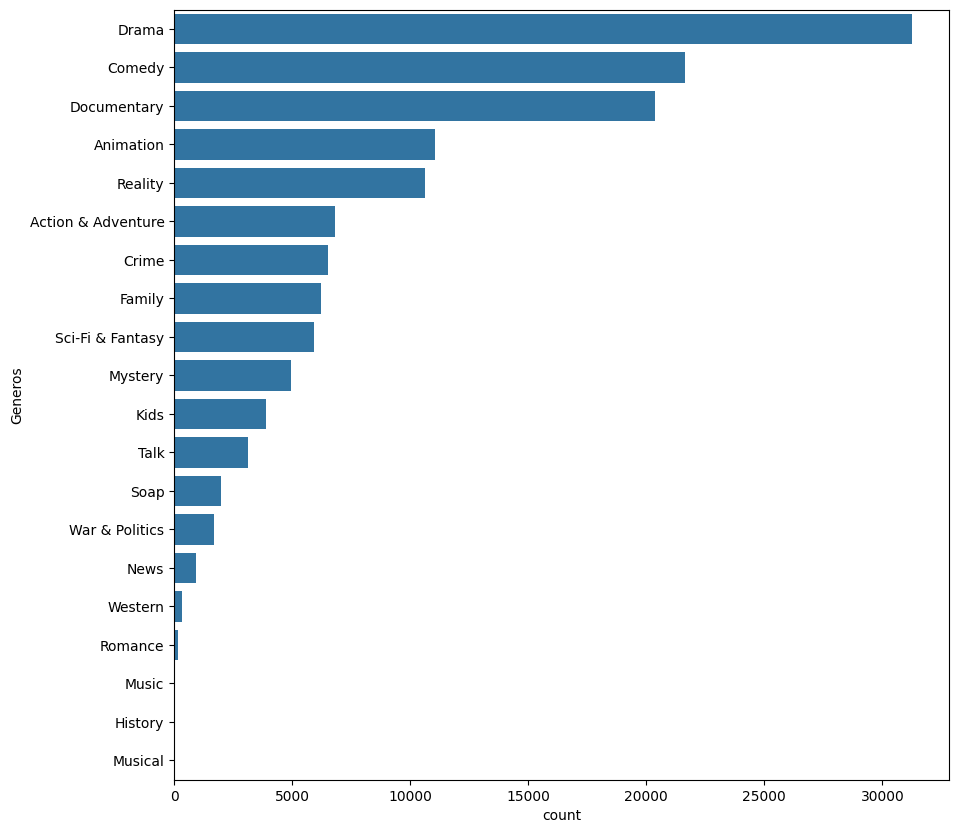

In [110]:
genero_con=genero.copy()

genero_con=genero_con[genero_con['Generos']!='sin informacion']
genero_con['Generos']=genero_con['Generos'].str.strip()
plt.figure(figsize=(10, 10))
sns.countplot(data=genero_con,y='Generos',order=genero_con['Generos'].value_counts().index)

<Figure size 3000x800 with 0 Axes>

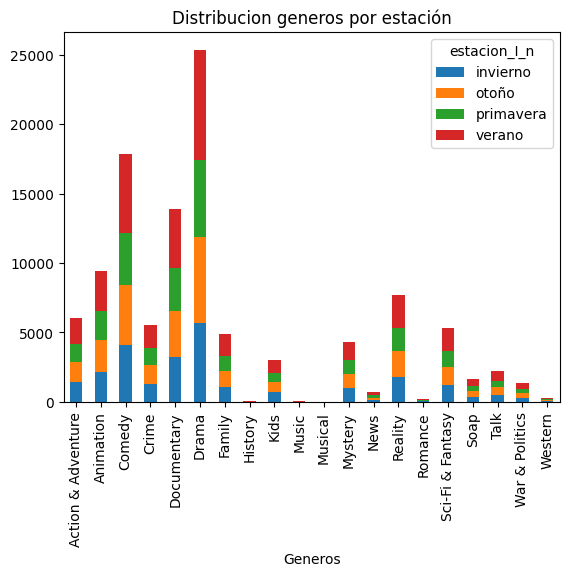

In [111]:
genero_fecha=genero_con.join(tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']],lsuffix='_left')
df=genero_fecha.groupby(['Generos','estacion_I_n']).size().unstack(fill_value=0)
plt.figure(figsize=(20, 8)).set_figwidth(30)
df.plot(kind='bar', stacked=True)
plt.title("Distribucion generos por estación")

plt.show()


A partir de los graficos se puede analizar lo siguiente: 
Los generos tienen un comportamiento similar a los estreno con relacion a la estacion, donde en verano siempre se emiten mayor cantidad.
El top 3 corresponde a Drama, comedia y documentales, lo cual muestra un 

## EFECTO DE LA ESTACION

Text(0.5, 1.0, 'Finalizados')

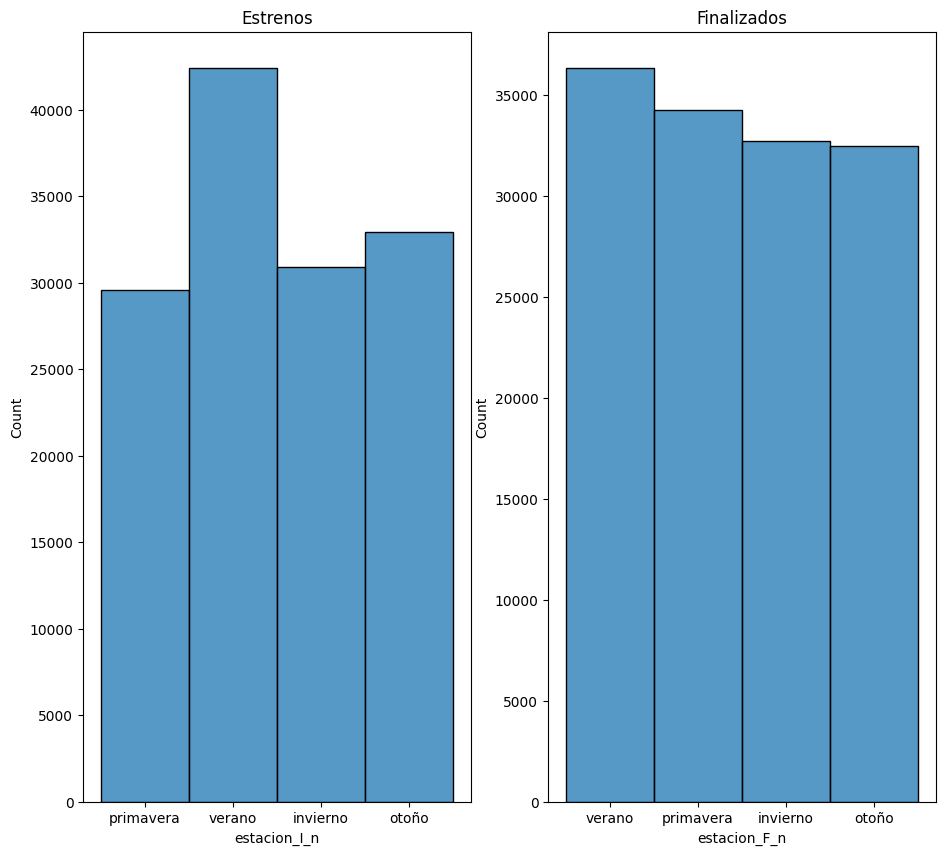

In [112]:
fig, axis = plt.subplots(1, 2, figsize = (11, 10))

# Crear un histograma múltiple

ax3=sns.histplot(ax = axis[ 0], data = tmdb, x = "estacion_I_n")
ax4=sns.histplot(ax = axis[1], data = tmdb, x = "estacion_F_n")
ax3.set_title('Estrenos')
ax4.set_title('Finalizados')

Text(0.5, 1.0, 'Estacion de año Estreno V/S Finalizado')

<Figure size 1000x1000 with 0 Axes>

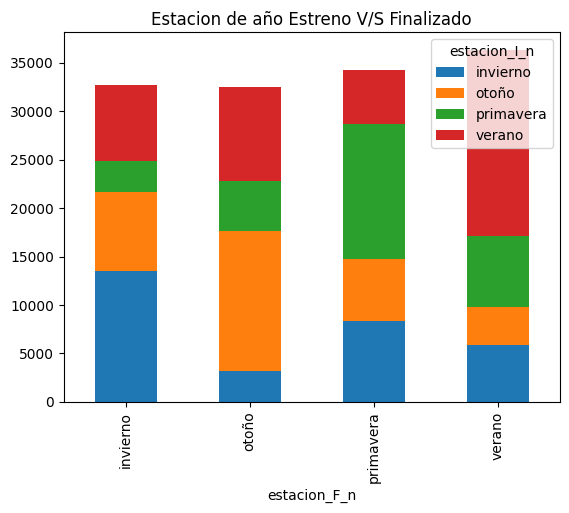

In [113]:
genero_fecha=tmdb[['anho_I','anho_F','estacion_I_n','estacion_F_n']]
df=genero_fecha.groupby(['estacion_F_n','estacion_I_n']).size().unstack(fill_value=0)
ax=plt.figure(figsize=(10, 10))
df.plot(kind='bar', stacked=True)
plt.title("Estacion de año Estreno V/S Finalizado")

In [114]:
tmdb[['estacion_I_n','estacion_F_n']].value_counts()

estacion_I_n  estacion_F_n
verano        verano          19225
otoño         otoño           14389
primavera     primavera       13867
invierno      invierno        13554
verano        otoño            9700
invierno      primavera        8302
otoño         invierno         8152
verano        invierno         7829
primavera     verano           7337
otoño         primavera        6473
invierno      verano           5861
verano        primavera        5635
primavera     otoño            5188
otoño         verano           3912
invierno      otoño            3209
primavera     invierno         3173
Name: count, dtype: int64

IDIOMAS

In [115]:
idioma=pd.read_csv('Idiomas.csv')
idioma=idioma[idioma['Idiomas']!='sin informacion']
idioma['Idiomas']=idioma['Idiomas'].str.strip()
idioma['Idiomas'].value_counts()

Idiomas
en    34467
ja    10981
zh     7796
de     6867
fr     6487
      ...  
rw        1
nv        1
ki        1
os        1
cr        1
Name: count, Length: 141, dtype: int64

Dado que tenemos mas de 100 idiomas nos centraremos en los 10 mas utilizados

In [116]:
idioma['Idiomas'].value_counts().head(10)

Idiomas
en    34467
ja    10981
zh     7796
de     6867
fr     6487
ko     4404
es     4384
pt     2871
nl     2435
ru     2088
Name: count, dtype: int64

Text(0.5, 1.0, 'top 10 idiomas ')

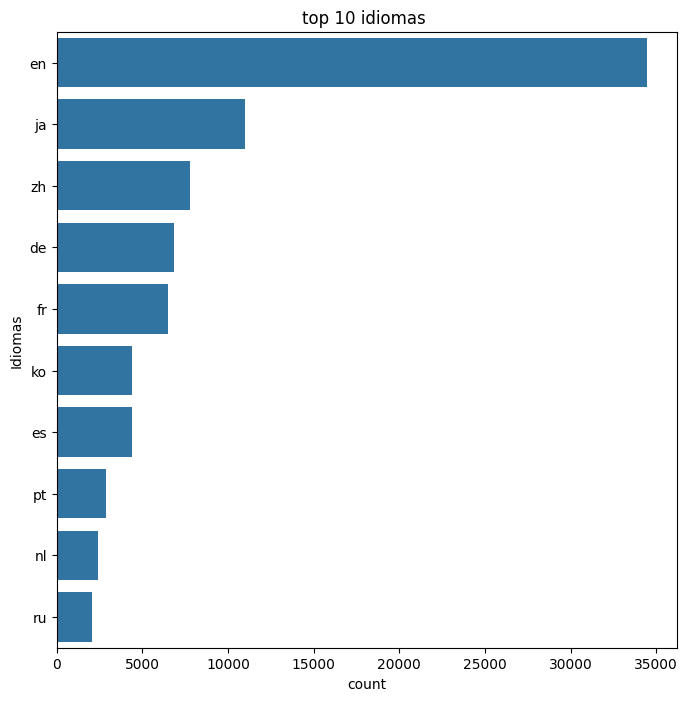

In [117]:

plt.figure(figsize=(8, 8))
sns.countplot(data=idioma,y='Idiomas',order=idioma['Idiomas'].value_counts().iloc[:10].index)
plt.title("top 10 idiomas ")

El idioma mas utilizado es el ingles, lo cual no es sorpresa ya que es el idioma mas hablado en el mundo por lo que usar este como voz principal ayuda a llegar a una mayor audiencia. Por otro lado si se considera la lengua madre,el chino y español le ganan al ingles, por lo que podria ser un mercado a explorar, pero estos idiomas sufren un problema al tener diversos dialectos.   



ref(https://www.ethnologue.com/insights/ethnologue200/)

In [118]:
tmdb.index

RangeIndex(start=0, stop=135806, step=1)

## INSIGHT

1. Se observa una posible recesion en lo show emitidos, tras la finalizacion de la pandemia.
2. No existe una relacion entre el momento que se emite un show y los generos usados.
3. Los generos mas utilizados son Drama, Comedia y documentarios.
4. El idioma mas utilizado al generar entretenimiento es el ingles. 
5. Dependiendo como se define la popularidad se obtiene diferentes resultados de cual show es consideralo el mejor. 

## Recomendaciones


Al tener menor publico, los show deben generar un mayor esfuerzo en ganarse a los usuarios por lo que es necesario una mayor planificacion en el show a emitir.

Hacer un estudio respecto a los dialectos del chino y español para ver la posibilidad de ganar audiencia apelando a la lengua madre. 


 

# Segunda entrega 

## Machine Learning

Se espera obtener un modelo para predecir la popularidad de los nuevos programas, para esto se realizara una regresion lineal multiple, para esto en primer lugar se debe preparar la data, partiendo por eliminar aquellas variables que no seran necesarias, como por ejemplo el nombre del show, el id 

In [119]:
tmdb_regresion=tmdb.copy()
tmdb_regresion=tmdb_regresion.drop(columns=['id','Nombre_Serie','Nombre_Original','Tipo_Show','Status','Pais_Origen','estacion_I_n','estacion_F_n','Fecha_Inicio','Fecha_Fin'])

In [120]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error, accuracy_score
train_set, test_set = train_test_split(tmdb_regresion,test_size=0.3, random_state=1)



In [121]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95064 entries, 63497 to 128037
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #_Temporadas              95064 non-null  int64  
 1   #_Episodios               95064 non-null  int64  
 2   Votos_Totales             95064 non-null  int64  
 3   Voto_promedio             95064 non-null  float64
 4   Categoria_Adulto          95064 non-null  bool   
 5   En_Produccion             95064 non-null  bool   
 6   Popularidad               95064 non-null  float64
 7   Duracion_episodio         95064 non-null  int64  
 8   num_Generos               95064 non-null  int64  
 9   num_Creador               95064 non-null  int64  
 10  num_Idiomas               95064 non-null  int64  
 11  num_Canales               95064 non-null  int64  
 12  num_Idiomas_hablados      95064 non-null  int64  
 13  num_Companias_Produccion  95064 non-null  int64  
 14  num_Pa

In [122]:
X_train=train_set[['Votos_Totales','Voto_promedio','#_Temporadas','#_Episodios','num_Generos']].copy()
X_test=test_set[['Votos_Totales','Voto_promedio','#_Temporadas','#_Episodios','num_Generos']].copy()
y_train=train_set['Popularidad'].copy()
y_test=test_set['Popularidad'].copy()


In [123]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_test_pred = model.predict(X_test)

In [125]:
model.intercept_

-1.5353523943961944

In [126]:
model.coef_

array([0.04072644, 0.5969793 , 0.51437643, 0.08824769, 2.64274277])

In [127]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

score = model.score(X_test, y_test)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')
print(f'Error absoluto medio (MAE): {mae}')
print(f'Error porcentual absoluto medio (MAPE): {mape}')
print(f'Score del Modelo: {score}')

Error cuadrático medio (MSE): 1756.9771743737617
Coeficiente de determinación (R²): 0.20547522755413183
Error absoluto medio (MAE): 7.490830028725025
Error porcentual absoluto medio (MAPE): 279480832299770.8
Score del Modelo: 0.20547522755413183


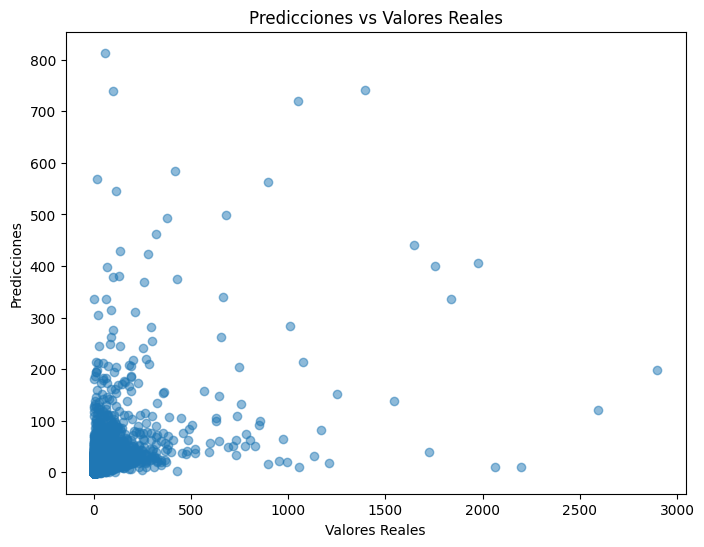

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

In [144]:
nombres_columnas= {'Votos_Totales':'Votos_Totales',	'Voto_promedio':'Voto_promedio',
'#_Temporadas':'num_Temporadas',
'#_Episodios':'num_Episodios',	
'num_Generos':'num_genero'}

X_train.rename(columns=nombres_columnas,inplace=True)

X_test.rename(columns=nombres_columnas,inplace=True)

In [137]:
X_train

,Votos_Totales,Voto_promedio,num_Temporadas,num_Episodios,num_genero
63497,0,0.0,1,20,1
60239,0,0.0,1,15,1
97988,0,0.0,1,5,1
92197,0,0.0,1,1,1
81979,0,0.0,1,6,1
...,...,...,...,...,...
73349,0,0.0,1,1,1
109259,0,0.0,2,18,1
50057,1,5.0,1,23,1
5192,41,6.7,4,65,2


In [139]:
import statsmodels.formula.api as sma
tmdb_train= pd.concat([X_train,y_train],axis=1)


In [141]:
model1 = 'Popularidad~Votos_Totales+Voto_promedio+num_Temporadas+num_Episodios+num_genero'
lm1   = sma.ols(formula = model1, data = tmdb_train).fit()

In [142]:
lm1   = sma.ols(formula = model1, data = tmdb_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            Popularidad   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3241.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:32:46   Log-Likelihood:            -4.9251e+05
No. Observations:               95064   AIC:                         9.850e+05
Df Residuals:                   95058   BIC:                         9.851e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5354      0.222     -6.

In [145]:
Y_mod=lm1.predict(X_test)
mean_squared_error(Y_mod,y_test)

1756.9771743737574


Se observa que el error obtenidos es mayor a 1 por lo que el el modelo no puede predecir de buena manera el resultado a partir de las variables escogidas.